In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set a random seed
np.random.seed(42)

In [2]:
def derivative(f, a, h=0.01):
    '''Approximates the derivative of the function f in a
    
    :param function f: function to differentiate
    :param float a: the point of differentiation
    :param float h: step size
    :return float: the derivative of f in a
    '''
    return (f(a + h) - f(a - h))/(2*h)

In [3]:
def stieltjes_integral(f, g, a, b, n):
    '''Calculates the Riemann-Stieltjes integral based on the composite trapezoidal rule
    relying on the Riemann Sums.
    
    :param function f: integrand function
    :param function f: integrator function 
    :param int a: lower bound of the integral
    :param int b: upper bound of theintergal
    :param int n: number of trapezoids of equal width
    :return float: the integral of the function f between a and b
    '''
    h = (b - a)/n  # width of the rectangle
    dg = lambda x: derivative(g, x, h=1e-8)  # derivative of the integrator function
    result = 0.5*f(a)*dg(a) + sum([f(a + i*h)*dg(a + i*h) for i in range(1, n)]) + 0.5*f(b)*dg(b)
    result *= h
    return result

In [4]:
f = lambda x: x  # simple linear function
g = lambda x: 2 * x  # simple translation
a, b = 2, 5  # the intervals of integration
N = 300  # number of points to generate
T = b - a  # number of units
points_per_unit = N // T  # number of points per unit

t = np.linspace(0, b, points_per_unit*b + 1)
F = f(t)

X = np.linspace(a, b, N + 1)  # generate more points on the x-axis
Y = f(X)  # original function
G = g(X)  # transformation

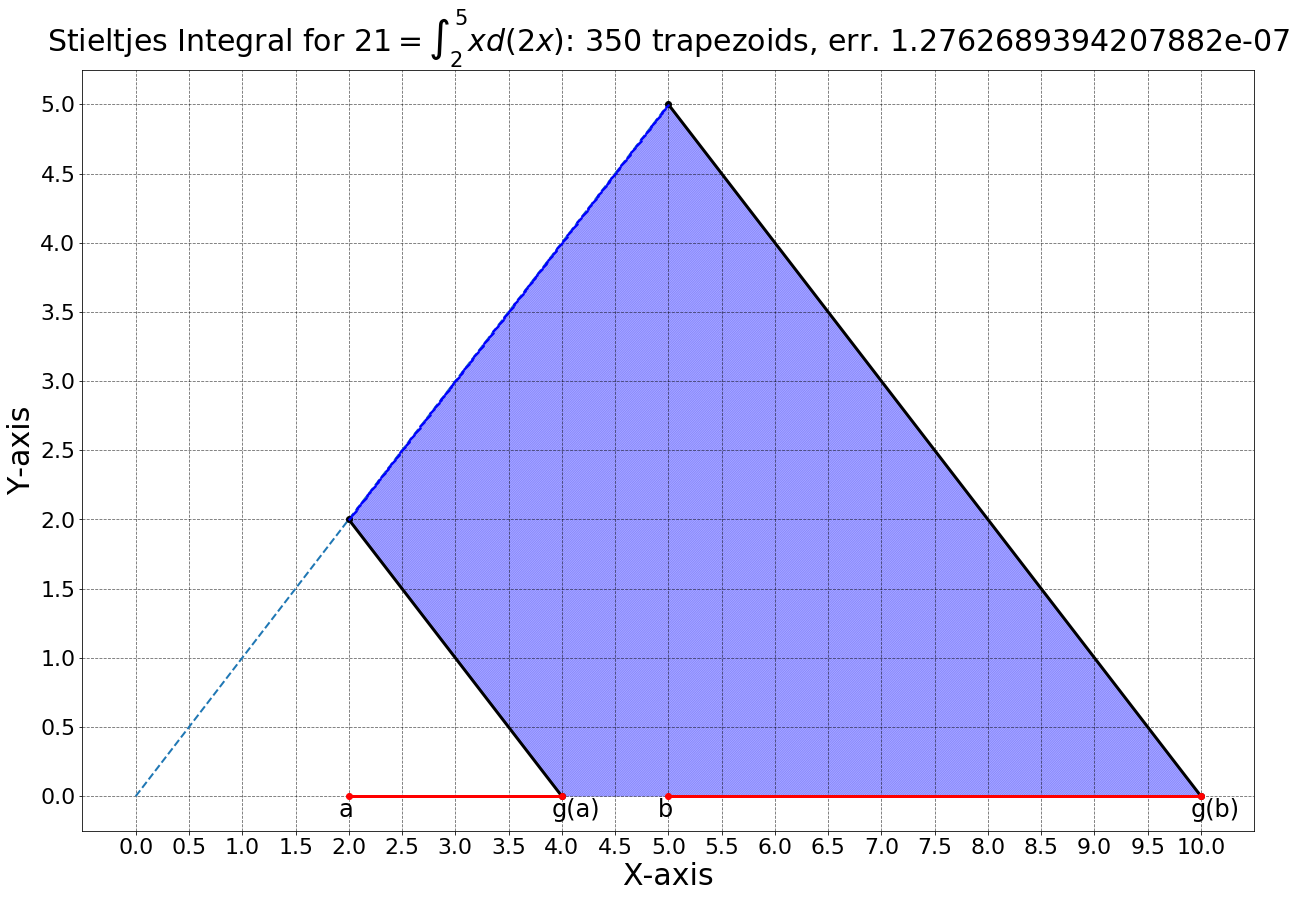

In [5]:
fig = plt.figure(figsize=(21, 14))  # make a new figure
ax = plt.axes(xlim=(-0.5, 10.5), ylim = (-0.25, 5.25))  # make a new axes object

ax.set_xticks(np.linspace(0, 10, 21))  # format the x-axis
ax.set_xlabel('X-axis', fontsize=30)

ax.set_yticks(np.linspace(0, 5, 11))  # format the y-axis
ax.set_ylabel('Y-axis', fontsize=30)

ax.tick_params(labelsize=22)  # make the ticks larger
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)

ax.set_title('Stieltjes Integral for $21 = \int_{{2}}^{{5}} x d(2x)$: transforming $x$ to $2x$', fontsize=30)

X_left = X[:-1]  # the left points of the intervals on the x-axis
Y_left = Y[:-1]  # the function values at the left points
G_left = G[:-1]  # transformation values

ax.plot(t, F,'--', lw=2)  # plot the full line


line1, = ax.plot([X[0], X[0]], [0, Y[0]], 'ko-', lw=3)  # line to slide from a to g(a)
line2, = ax.plot([X[N], X[N]], [0, Y[N]], 'ko-', lw=3)  # line to slide from b to g(b)

redline1, = ax.plot([X[0], G[0]], [0, 0], 'ro-', lw=3)  # red line connecting a to g(a)
text_a = ax.text(X[0] - 0.1, -0.15, 'a', fontsize=24)  # text for a value
text_ga = ax.text(G[0] - 0.1, -0.15, 'g(a)', fontsize=24)  # text for g(a) value

redline2, = ax.plot([X[N], G[N]], [0, 0], 'ro-', lw=3)  # red line connecting b to g(b)
text_b = ax.text(X[N] - 0.1, -0.15, 'b', fontsize=24)  # text for b value
text_gb = ax.text(G[N] - 0.1, -0.15, 'g(b)', fontsize=24)  # text for g(b) value

num_sliding_points = 100
points_a = np.linspace(X[0], G[0], num_sliding_points)  # generate N points between g(a) and a
points_b = np.linspace(X[N], G[N], num_sliding_points)  # generate N points between g(b) and b

num_waiting_iters = 50
num_integration_iters = 70
factor = 5  # num of trapezoids to increase each iteration

def animate(i):
    if i < num_sliding_points:  # slide lines
        line1.set_data([points_a[i], X[0]], [0, Y[0]])
        line2.set_data([points_b[i], X[N]], [0, Y[N]])
        
        return line1, line2,
    else:  # start increasing the trapezoids
        plt.cla()  # clear all previous axes objects
        
        ax = plt.axes(xlim=(-0.5, 10.5), ylim = (-0.25, 5.25))  # make a new axes object
        ax.set_xticks(np.linspace(0, 10, 21))  # format the x-axis
        ax.set_xlabel('X-axis', fontsize=30)
        ax.set_yticks(np.linspace(0, 5, 11))  # format the y-axis
        ax.set_ylabel('Y-axis', fontsize=30)
        ax.tick_params(labelsize=22)  # make the ticks larger
        ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)
        
        
        l, = ax.plot(t, F,'--', lw=2)  # plot the full line
        l1, = ax.plot([G[0], X[0]], [0, Y[0]], 'ko-', lw=3)
        l2, = ax.plot([G[N], X[N]], [0, Y[N]], 'ko-', lw=3)
        
        redline1, = ax.plot([X[0], G[0]], [0, 0], 'ro-', lw=3)  # red line connecting a to g(a)
        text_a = ax.text(X[0] - 0.1, -0.15, 'a', fontsize=24)  # text for a value
        text_ga = ax.text(G[0] - 0.1, -0.15, 'g(a)', fontsize=24)  # text for g(a) value

        redline2, = ax.plot([X[N], G[N]], [0, 0], 'ro-', lw=3)  # red line connecting b to g(b)
        text_b = ax.text(X[N] - 0.1, -0.15, 'b', fontsize=24)  # text for b value
        text_gb = ax.text(G[N] - 0.1, -0.15, 'g(b)', fontsize=24)  # text for g(b) value
        
        j = i - (num_sliding_points + num_waiting_iters)
        
        # calculate the number of trapezoids
        num_trapezoids = (j + 1) * factor if i > num_sliding_points + num_waiting_iters else 5
        
        y_int = stieltjes_integral(f, g, a, b, num_trapezoids)  # calculate the Stieltjes integral
        err = np.abs(21.0 - y_int)  # calculate the error
        
        if i > num_sliding_points + num_waiting_iters:
            ax.set_title(f'Stieltjes Integral for $21 = \int_{{2}}^{{5}} x d(2x)$: {num_trapezoids} trapezoids, err. {err}', fontsize=30)
        else:
            ax.set_title('Stieltjes Integral for $21 = \int_{{2}}^{{5}} x d(2x)$: starting the integration', fontsize=30)
        
        x1 = np.linspace(a, b, num_trapezoids + 1)  # original scales
        y1 = f(x1)
        x2 = np.linspace(g(a), g(b), num_trapezoids + 1)  # transformed scales
        
        x1_mid = (x1[:-1] + x1[1:])/2  # the middle points of the intervals on the x-axis
        y1_mid = f(x1_mid)  # the function values at the middle points
    
        points, = ax.plot(x1_mid,y1_mid,'b.',markersize=3)  # plot the mid points
        
        for k in range(num_trapezoids):
            x_coord = [x2[k], x2[k + 1], x1[k + 1], x1[k]]
            y_coord = [0, 0, y1[k + 1], y1[k]]
            ax.add_patch(patches.Polygon(xy=list(zip(x_coord, y_coord)), fill=True, color='b', alpha=0.2))
        
        return l, l1, l2, points,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=num_sliding_points + num_waiting_iters + num_integration_iters, interval=50, blit=True)
# save the animation as mp4 video file 
anim.save('rieman_stieltjes.gif',writer='imagemagick') 